In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

# Change inputs


In [2]:
input_path = r'C:/Users/leonz/PyCharmMiscProject/Mcell_blender/react_data_20um/seed_'
saving_dir_path = r'C:/Users/leonz/PyCharmMiscProject/Mcell_blender/results_20_um/'
total_channels = 608

## Saving figure

In [3]:
def saving_figures (fig_id, path = saving_dir_path):
    os.makedirs(path, exist_ok=True)
    fig_name = path + str(fig_id) +'.png'
    plt.savefig (fig_name, format = 'png')

# Loading data

In [4]:
# To create a list with path to data directories
data_dirs_paths = []
seed_numbers = []
for num in range (1,11,1):
    seed_num = str(num)
    while len (seed_num) < 5:
        seed_num = "0" + seed_num
    path_2_dir = input_path + seed_num + "/"
    data_dirs_paths.append(path_2_dir)
    seed_numbers.append(seed_num)
data_dirs_paths

['C:/Users/leonz/PyCharmMiscProject/Mcell_blender/react_data_20um/seed_00001/',
 'C:/Users/leonz/PyCharmMiscProject/Mcell_blender/react_data_20um/seed_00002/',
 'C:/Users/leonz/PyCharmMiscProject/Mcell_blender/react_data_20um/seed_00003/',
 'C:/Users/leonz/PyCharmMiscProject/Mcell_blender/react_data_20um/seed_00004/',
 'C:/Users/leonz/PyCharmMiscProject/Mcell_blender/react_data_20um/seed_00005/',
 'C:/Users/leonz/PyCharmMiscProject/Mcell_blender/react_data_20um/seed_00006/',
 'C:/Users/leonz/PyCharmMiscProject/Mcell_blender/react_data_20um/seed_00007/',
 'C:/Users/leonz/PyCharmMiscProject/Mcell_blender/react_data_20um/seed_00008/',
 'C:/Users/leonz/PyCharmMiscProject/Mcell_blender/react_data_20um/seed_00009/',
 'C:/Users/leonz/PyCharmMiscProject/Mcell_blender/react_data_20um/seed_00010/']

In [5]:
# The files that we have in every directory
files = ["glu.Cube.dat", "glu.World.dat", "O.PSD.dat"]
files

['glu.Cube.dat', 'glu.World.dat', 'O.PSD.dat']

In [6]:
# Fetch data from every directory. Here every data is a list in a global list
cube_data = []
world_data = []
channel_data = []
time = []
for dir_path in data_dirs_paths:
    index = 0
    for file in files:
        index += 1
        filename = dir_path + file
        f = [ line.rstrip ('\n') for line in open (filename).readlines() ]
        time = [ float (line.split (' ') [0]) for line in f]
        data = [ int (line.split (' ') [1]) for line in f]
        if index == 1:
            cube_data.append (data)
        elif index == 2:
            world_data.append (data)
        else:
            channel_data.append (data)
len (time), len (cube_data), len(world_data), len(channel_data)
# Now seed_0 data is the 0th item in each list, and seed_1 is the 1st item...

(3001, 10, 10, 10)

In [7]:
cube_data [0] [1:5], cube_data [1] [1:5]

([4987, 4987, 4986, 4985], [4986, 4987, 4984, 4979])

# Raw data plotting

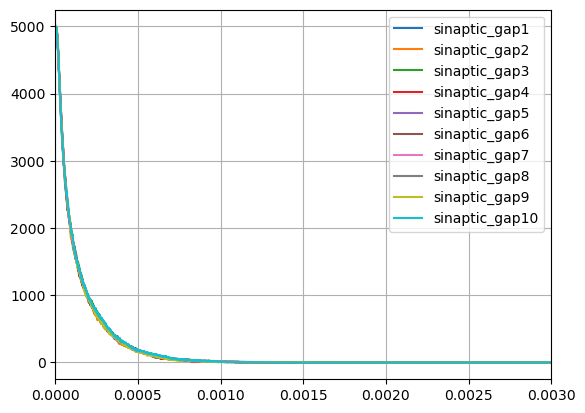

In [8]:
# sinaptical gap glu count
index = 0
for data in cube_data:
    index += 1
    plt.plot (time, data, label = "sinaptic_gap" + str (index))
plt.grid (True)
plt.legend ()
plt.xlim ([0, 0.003])
plt.show()

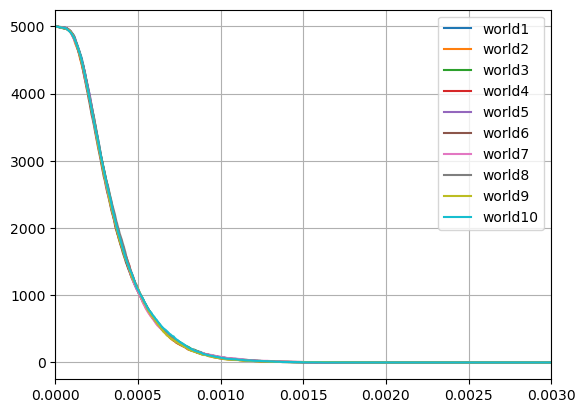

In [9]:
# World glu number count plot
index = 0
for data in world_data:
    index += 1
    plt.plot (time, data, label = "world" + str (index))
plt.grid (True)
plt.legend ()
plt.xlim ([0, 0.003])
plt.show()

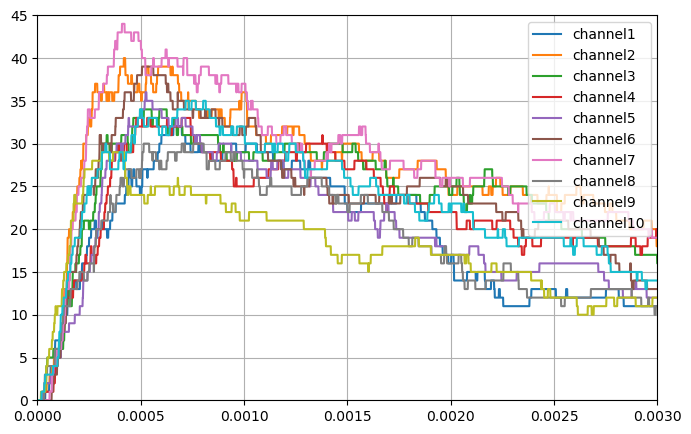

In [10]:
# Opened channels plot
index = 0
plt.figure (figsize = (8,5))
for data in channel_data:
    index += 1
    plt.plot (time, data, label = "channel" + str (index))
plt.grid (True)
plt.legend ()
plt.axis ([0,0.003,0,45])
plt.show()

In [11]:
## Opened channel percentage
channel_per_data = []
for channel in channel_data:
    temp_list = []
    for data in channel:
        percentage = (data/total_channels)*100
        temp_list.append(percentage)
    channel_per_data.append(temp_list)
len (channel_per_data)


10

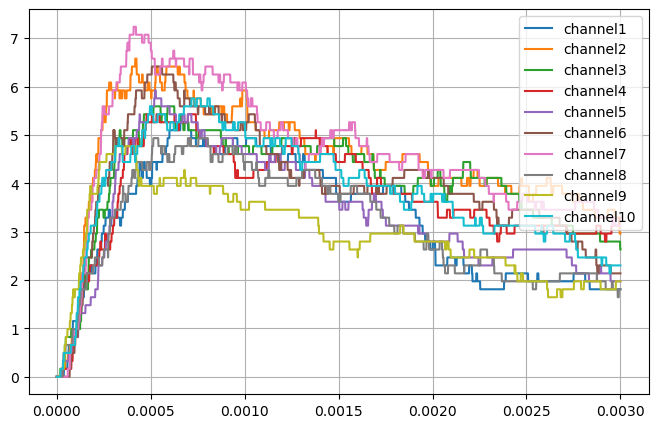

In [12]:
# Opened channels percentage plot
index = 0
plt.figure (figsize = (8,5))
for data in channel_per_data:
    index += 1
    plt.plot (time, data, label = "channel" + str (index))
plt.grid (True)
plt.legend ()
plt.show()

# Mean value curve

In [13]:
# Calculate media from each data file

def calculate_mean (list_of_data):
    means = []
    num_replicates = len(list_of_data)
    num_data = len (list_of_data [0])
    for i in range (num_data):
        mean = 0
        for j in range (num_replicates):
            mean += (list_of_data[j][i])
        mean  = mean / num_replicates
        means.append(mean)
    return means


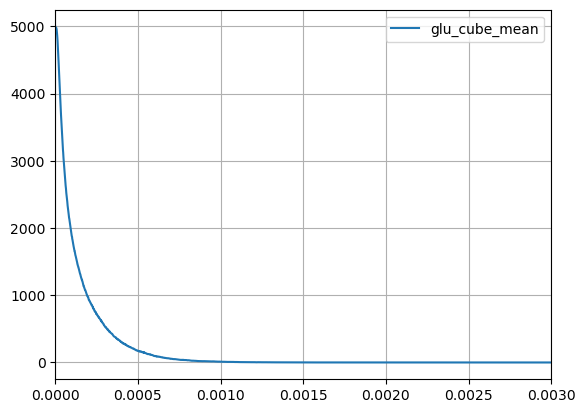

In [14]:
# Mean of Glu in the cube
glu_cube_mean = calculate_mean(cube_data)
plt.plot (time, glu_cube_mean, label = "glu_cube_mean")
plt.xlim ([0, 0.003])
plt.grid (True)
plt.legend ()
plt.show ()

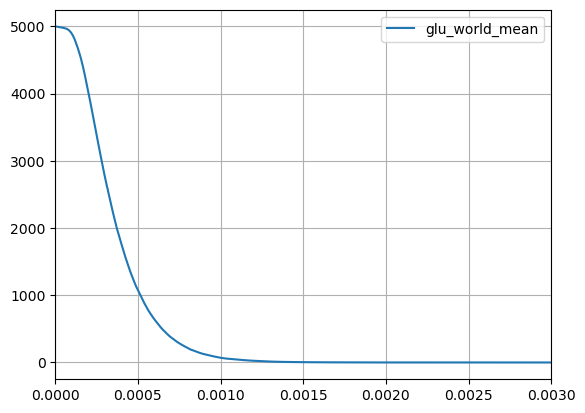

In [15]:
# Mean of Glu in the world
glu_world_mean = calculate_mean(world_data)
plt.plot (time, glu_world_mean, label = "glu_world_mean")
plt.xlim ([0, 0.003])
plt.grid (True)
plt.legend ()
plt.show ()

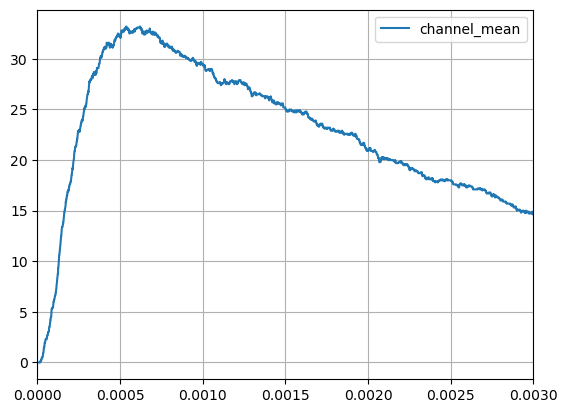

In [16]:
## Opened channel meanc
channel_mean = calculate_mean(channel_data)
plt.plot (time, channel_mean, label = "channel_mean")
plt.xlim ([0, 0.003])
plt.grid (True)
plt.legend ()
plt.show ()

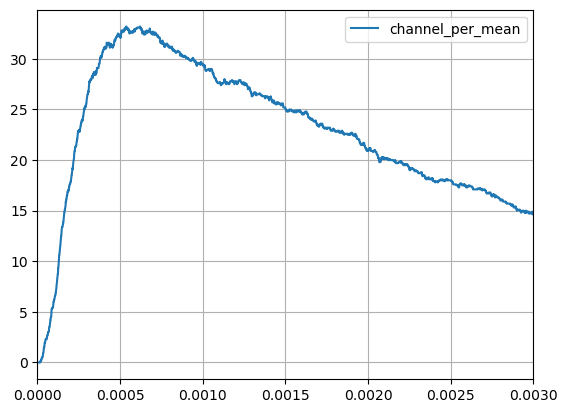

In [17]:
## Mean opened channel percentage data
channel_per_mean = calculate_mean(channel_per_data)
plt.plot (time, channel_mean, label = "channel_per_mean")
plt.xlim ([0, 0.003])
plt.grid (True)
plt.legend ()
plt.show ()

# Enveloper curves

In [18]:
## Get max and min
def get_max_min (list_of_data):
     num_replicates = len(list_of_data)
     num_data = len (list_of_data [0])
     maxs = []
     mins = []
     for i in range (num_data):
         temp_list = []
         for j in range (num_replicates):
             temp_list.append(list_of_data[j][i])
         maxs.append(max(temp_list))
         mins.append(min(temp_list))
     return maxs, mins



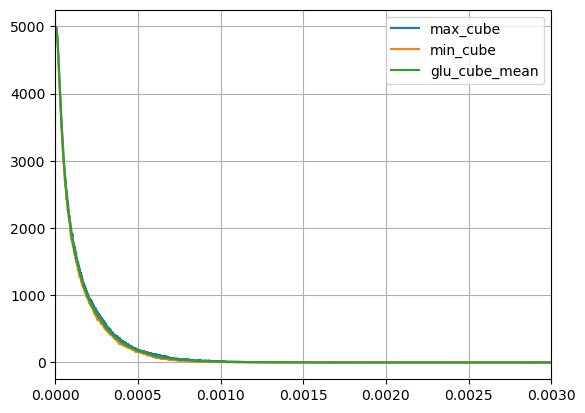

In [19]:
## Max value for cube data
max_cube, min_cube = get_max_min (cube_data)
plt.plot (time, max_cube, label = "max_cube")
plt.plot (time, min_cube, label = "min_cube")
plt.plot (time, glu_cube_mean, label = "glu_cube_mean")
plt.xlim ([0, 0.003])
plt.grid (True)
plt.legend ()
plt.show ()

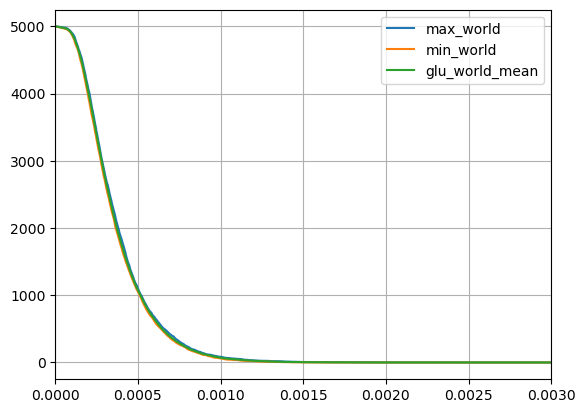

In [20]:
max_world, min_world = get_max_min (world_data)
plt.plot (time, max_world, label = "max_world")
plt.plot (time, min_world, label = "min_world")
plt.plot (time, glu_world_mean, label = "glu_world_mean")
plt.xlim ([0, 0.003])
plt.grid (True)
plt.legend ()
plt.show ()

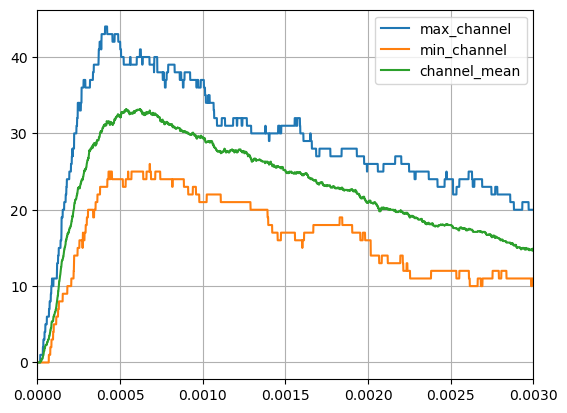

In [21]:
max_channel, min_channel = get_max_min (channel_data)
plt.plot (time, max_channel, label = "max_channel")
plt.plot (time, min_channel, label = "min_channel")
plt.plot (time, channel_mean, label = "channel_mean")
plt.xlim ([0, 0.003])
plt.grid (True)
plt.legend ()
plt.show ()

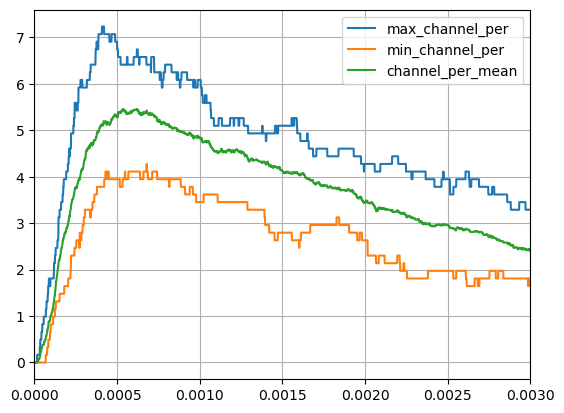

In [22]:
max_channel_per, min_channel_per = get_max_min(channel_per_data)
plt.plot (time, max_channel_per, label = "max_channel_per")
plt.plot (time, min_channel_per, label = "min_channel_per")
plt.plot (time, channel_per_mean, label = "channel_per_mean")
plt.xlim ([0, 0.003])
plt.grid (True)
plt.legend ()
plt.show ()

## Get curve peaks

In [23]:
# Get max number of channel opened
def get_curve_peak (x_ax, y_ax):
    y_peak = max (y_ax)
    max_index = y_ax.index (y_peak)
    x_peak = x_ax [max_index]
    return x_peak, y_peak

In [24]:
time_channel_peak_max, channel_peak_max = get_curve_peak(time, max_channel)
time_channel_peak_max, channel_peak_max

(0.000409, 44)

In [25]:
time_channel_peak_mean, channel_peak_mean = get_curve_peak(time, channel_mean)
time_channel_peak_mean, channel_peak_mean

(0.000537, 33.2)

In [26]:
time_channel_peak_min, channel_peak_min = get_curve_peak (time, min_channel)
time_channel_peak_min, channel_peak_min

(0.000679, 26)

# Get molar concentration : inputs

In [27]:
NA = 6.022e23
vol_cube = 4.029e-3 #mum^3
vol_world = 6# mum^3
vol_cube_L = vol_cube /1e15
vol_world_L = vol_world /1e15

In [28]:
def convert_molar_concentration (num_molecules,volume, avogadro = NA):
    return (num_molecules/avogadro) / volume

In [29]:
## Get molar concentration (Cube)
molar_cube = []
for data in cube_data:
    temp_list = []
    for mol_number in data:
        molar_concentration = convert_molar_concentration(mol_number, vol_cube_L)
        temp_list.append(molar_concentration)
    molar_cube.append(temp_list)


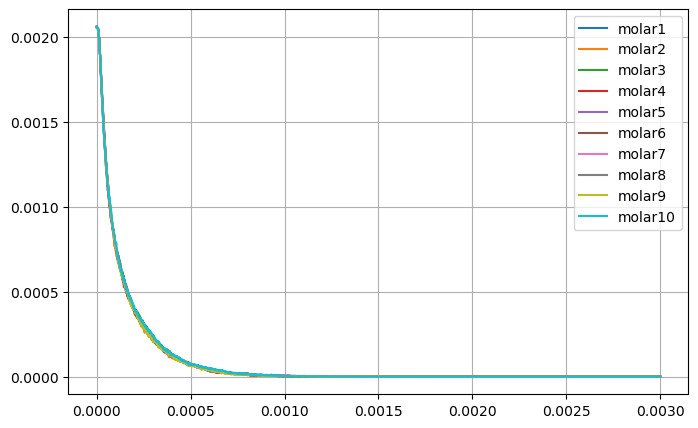

In [30]:
## Plot molar concentration
index = 0
plt.figure (figsize = (8,5))
for data in molar_cube:
    index += 1
    plt.plot (time, data, label = "molar" + str (index))
plt.grid (True)
plt.legend ()
plt.show()

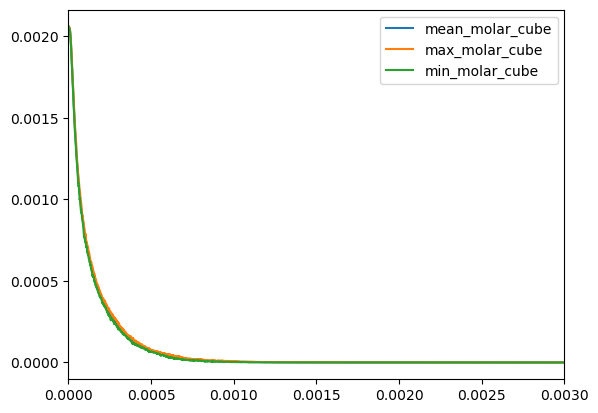

In [31]:
mean_molar_cube = calculate_mean(molar_cube)
max_molar_cube, min_molar_cube = get_max_min(molar_cube)
plt.plot (time, mean_molar_cube, label = "mean_molar_cube")
plt.plot (time, max_molar_cube, label = "max_molar_cube")
plt.plot (time, min_molar_cube, label = "min_molar_cube")
plt.legend ()
plt.xlim ([0, 0.003])
plt.show ()

In [32]:
## Get world molar_concentration
molar_world = []
for data in world_data:
    temp_list = []
    for mol_number in data:
        molar_concentration = convert_molar_concentration(mol_number, vol_world_L)
        temp_list.append(molar_concentration)
    molar_world.append(temp_list)

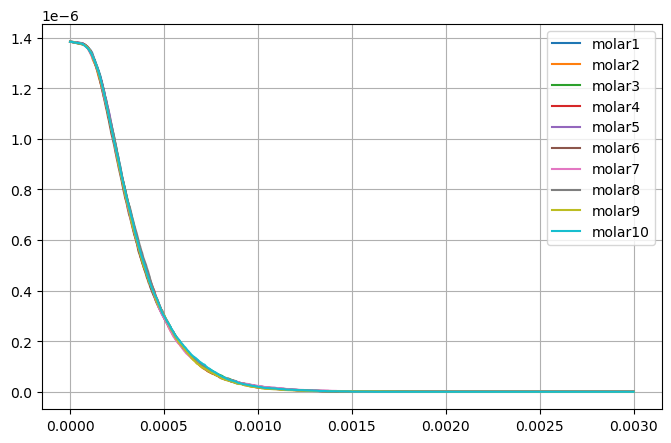

In [33]:
## Plot molar concentration
index = 0
plt.figure (figsize = (8,5))
for data in molar_world:
    index += 1
    plt.plot (time, data, label = "molar" + str (index))
plt.grid (True)
plt.legend ()
plt.show()

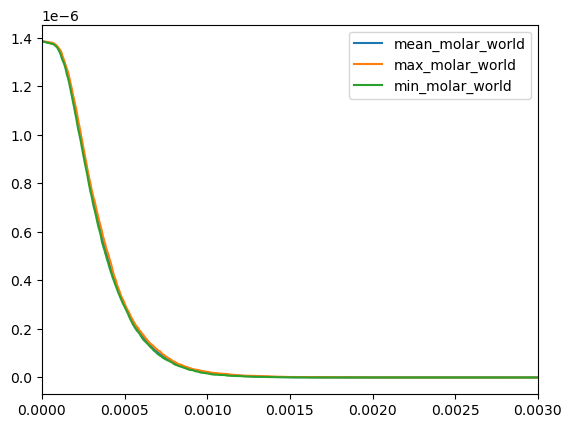

In [34]:
mean_molar_world = calculate_mean(molar_world)
max_molar_world, min_molar_world = get_max_min(molar_world)
plt.plot (time, mean_molar_world, label = "mean_molar_world")
plt.plot (time, max_molar_world, label = "max_molar_world")
plt.plot (time, min_molar_world, label = "min_molar_world")
plt.legend ()
plt.xlim ([0, 0.003])
plt.show ()

## Opened channels: absolute value and %

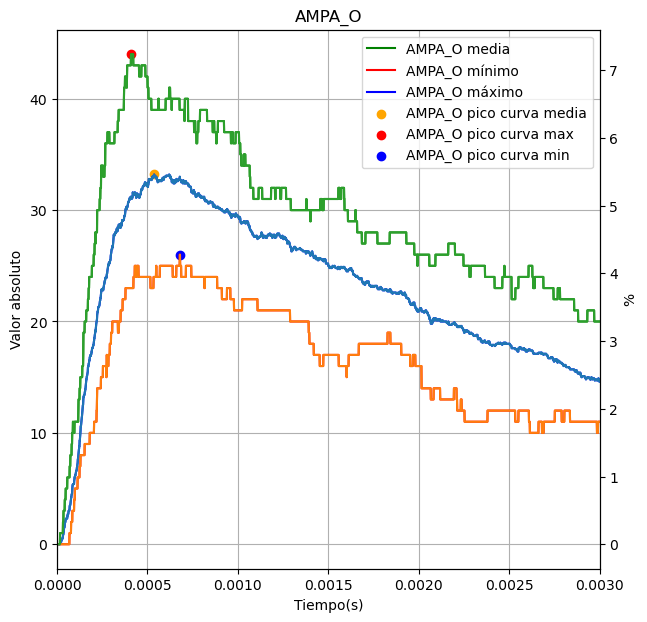

In [35]:
## Same Y axis, two scales
fig, ax1 = plt.subplots(figsize = (7,7))
ax1.plot(time, max_channel, "g-", label="AMPA_O media ")
ax1.plot(time, min_channel, "r-", label="AMPA_O mínimo")
ax1.plot(time, channel_mean, "b-", label="AMPA_O máximo")
ax1.scatter (time_channel_peak_mean, channel_peak_mean, color = "orange", label = "AMPA_O pico curva media")
ax1.scatter (time_channel_peak_max, channel_peak_max, color = "red", label = "AMPA_O pico curva max")
ax1.scatter (time_channel_peak_min, channel_peak_min, color = "blue", label = "AMPA_O pico curva min")
ax1.legend()
ax1.grid(True)
ax1.set_ylabel("Valor absoluto")
ax1.set_xlabel("Tiempo(s)")
ax2 = ax1.twinx()
ax2.plot (time, channel_per_mean)
ax2.plot (time, min_channel_per)
ax2.plot (time, max_channel_per)
ax2.set_ylabel("%")
plt.xlim([0, 0.003])
plt.title ("AMPA_O")
saving_figures("opened_channels")
plt.show()

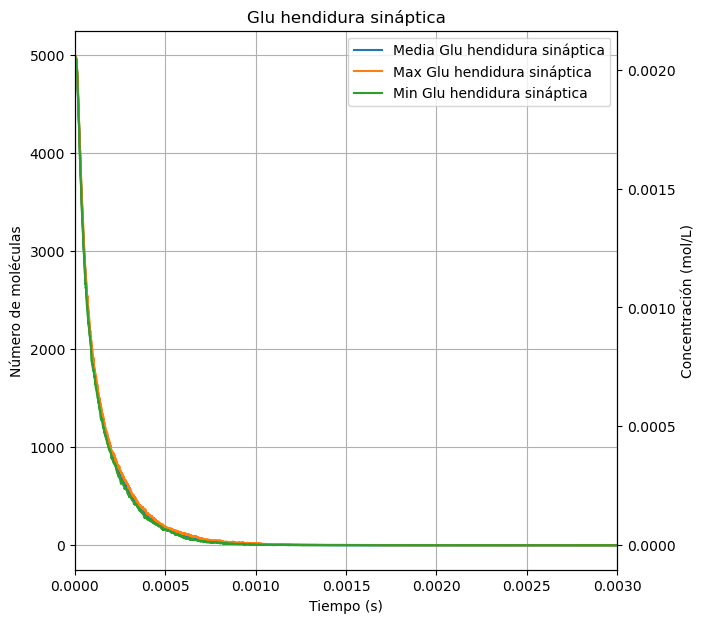

In [36]:
## Glu plots Cube
fig, ax1 = plt.subplots(figsize = (7,7))
ax1.plot (time, glu_cube_mean, label = "Media Glu hendidura sináptica")
ax1.plot (time, max_cube, label = "Max Glu hendidura sináptica")
ax1.plot (time, min_cube, label = "Min Glu hendidura sináptica")
ax1.grid (True)
ax1.set_ylabel("Número de moléculas")
ax1.set_xlabel("Tiempo (s)")
ax1.legend ()

ax2 = ax1.twinx()
ax2.plot (time, mean_molar_cube)
ax2.plot (time, max_molar_cube)
ax2.plot (time, min_molar_cube)
ax2.set_ylabel ("Concentración (mol/L)")


plt.title ("Glu hendidura sináptica")
plt.xlim ([0, 0.003])
saving_figures("sinaptic_gap_Glu")
plt.show ()

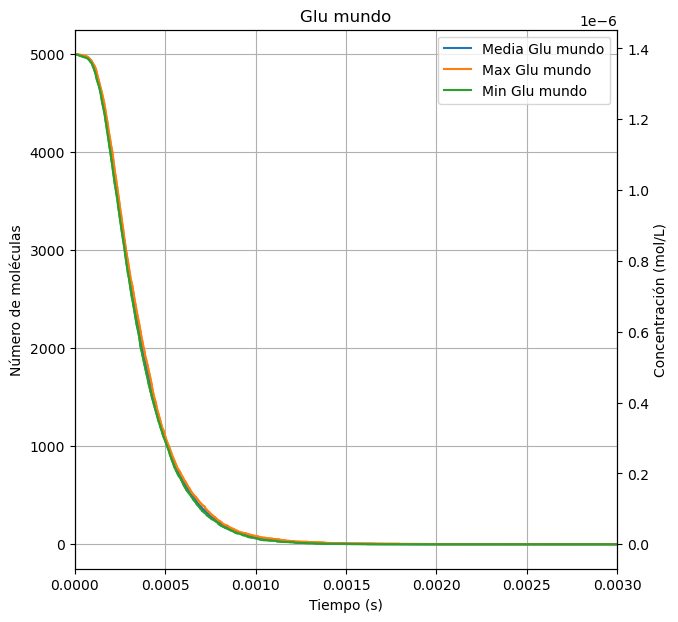

In [37]:
## Glu plots Cube
fig, ax1 = plt.subplots(figsize = (7,7))
ax1.plot (time, glu_world_mean, label = "Media Glu mundo")
ax1.plot (time, max_world, label = "Max Glu mundo")
ax1.plot (time, min_world, label = "Min Glu mundo")
ax1.grid (True)
ax1.set_ylabel("Número de moléculas")
ax1.set_xlabel("Tiempo (s)")
ax1.legend ()

ax2 = ax1.twinx()
ax2.set_ylabel ("Concentración (mol/L)")
ax2.plot (time, mean_molar_world)
ax2.plot (time, max_molar_world)
ax2.plot (time, min_molar_world)


plt.title ("Glu mundo")
plt.xlim ([0, 0.003])
saving_figures("world_Glu")
plt.show ()